In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
x, y = mnist.data.values, mnist.target.values
y = y.astype(float)

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y

array([5., 0., 4., ..., 4., 5., 6.])

5.0


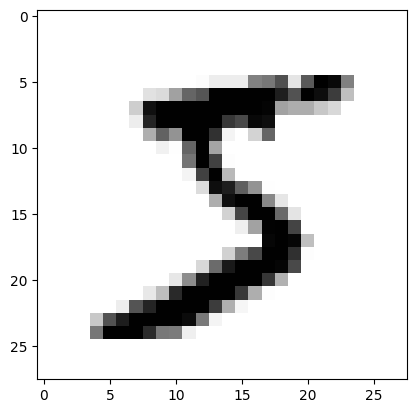

In [18]:
plt.imshow(x[0].reshape(28,28), cmap='binary')
print(y[0])
plt.show()

### Classificador Binário

In [20]:
### Qndo é 5?

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
y_train_5 = (y_train == 5)

In [24]:
pd.Series(y_train_5).value_counts()

False    44613
True      4387
Name: count, dtype: int64

In [26]:
from sklearn.linear_model import SGDClassifier # Stocastic Gradient Decend

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


False


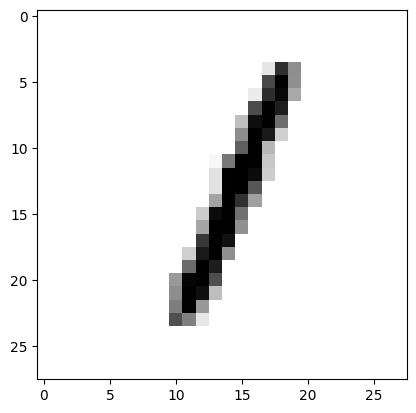

In [28]:
plt.imshow(x_train[0].reshape(28,28), cmap='binary')
print(y_train_5[0])
plt.show()

False


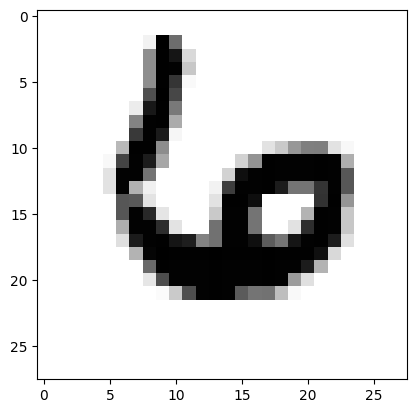

In [29]:
plt.imshow(x_train[1].reshape(28,28), cmap='binary')
print(y_train_5[1])
plt.show()

False


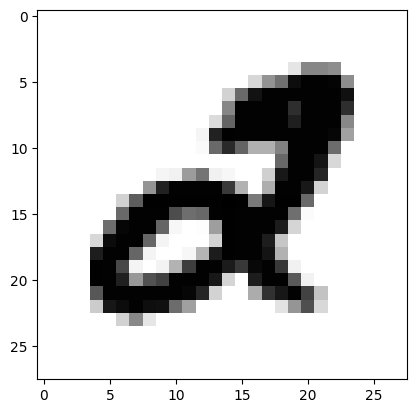

In [30]:
plt.imshow(x_train[2].reshape(28,28), cmap='binary')
print(y_train_5[2])
plt.show()

Classe real: True
Classe predita: [False]


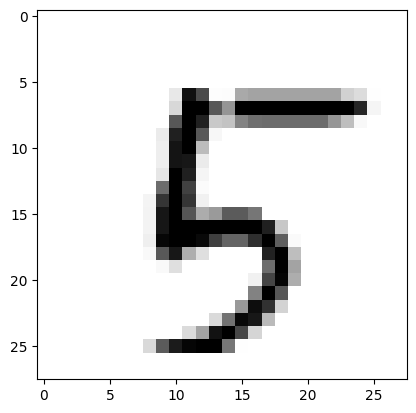

In [40]:
plt.imshow(x_train[8].reshape(28,28), cmap='binary')
print(f'Classe real: {y_train_5[8]}')
print(f'Classe predita: {sgd_clf.predict([x_train[8]])}')
plt.show()

Classe real: True
Classe predita: [ True]


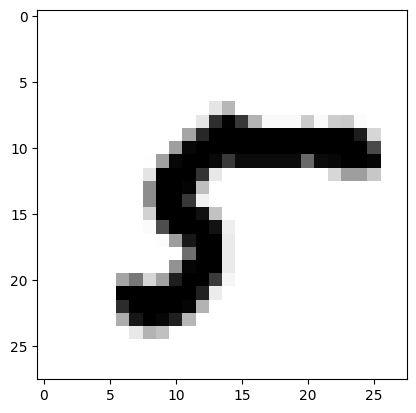

In [66]:
plt.imshow(x_train[33].reshape(28,28), cmap='binary')
print(f'Classe real: {y_train_5[33]}')
print(f'Classe predita: {sgd_clf.predict([x_train[33]])}')
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.97000122, 0.96895855, 0.96944836])

Isso para bom? Mas não é ! É necessário levar em conta a distribuição dos dados! Quantos números são de fato 5?  
Abaixo criaremos um modelo que prevê em 100% das vezes que não é 5 e vamos medir sua acurácia.

In [69]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [70]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, scoring='accuracy')

array([0.91030612, 0.9155102 , 0.91030612, 0.90744898, 0.90877551])

Conceitos

Precisão: Todos os acertos verdadeiros / todos que falei que eram verdadeiros -> True Positives / (True Positives + False Positives)  
Recall: Todos os acertos verdadeiros / valores que haviam para acertar verdadeiros-> True Positives / (True Positives + False Negatives)  # quantos deixou de acertar que tinha pra acertar  
Acuracia: Todos os acertos / todas as tentativas -> (True Positives + True Negatives) / (TP + TN + FP + FN)  

F1 Score: 2 * (Precisão * Recall) / (Precisão + Recall) # Média Harmônica, dá valores mais altos para modelos "equilibrados"


Matriz de confusão:

            PRED FALSE   PRED TRUE
REAL FALSE     TN           FP
REAL TRUE      FN           TP

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44116,   497],
       [  816,  3571]], dtype=int64)

In [88]:
TN = 44116
FN = 816
FP = 497
TP = 3571
precisao = TP/(TP+FP)
recall = TP/(TP+FN)

print(f'Precisão: {round(precisao,2)}')
print(f'Recall: {round(recall,2)}')
print(f'Acuracia: {round((TP+TN)/(TP+TN+FN+FP),2)}')
print(f'F1 Score: {round((2 * precisao * recall / (precisao + recall)),2)}')

Precisão: 0.88
Recall: 0.81
Acuracia: 0.97
F1 Score: 0.84


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print(f'Precisão: {precision_score(y_train_5, y_train_pred)}')
print(f'Recall: {recall_score(y_train_5, y_train_pred)}')

Precisão: 0.877826941986234
Reall: 0.8139958969683154


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     44613
        True       0.88      0.81      0.84      4387

    accuracy                           0.97     49000
   macro avg       0.93      0.90      0.92     49000
weighted avg       0.97      0.97      0.97     49000



### Classificador Multiclasses

In [89]:
sgd_clf.fit(x_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


array([1.])

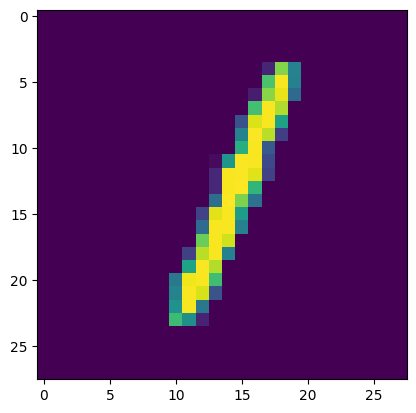

In [93]:
plt.imshow(x_train[0].reshape(28,28))
sgd_clf.predict([x_train[0]])

array([6.])

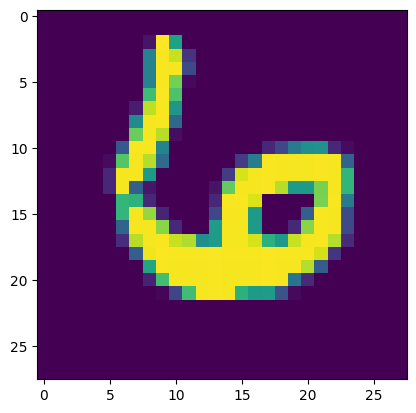

In [94]:
plt.imshow(x_train[1].reshape(28,28))
sgd_clf.predict([x_train[1]])

array([2.])

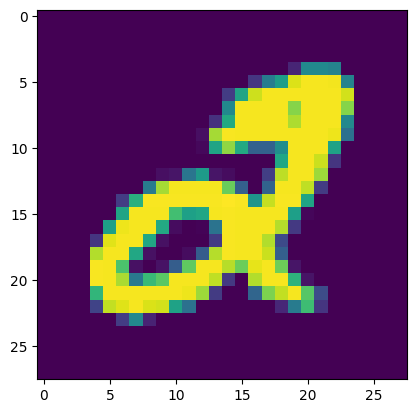

In [95]:
plt.imshow(x_train[2].reshape(28,28))
sgd_clf.predict([x_train[2]])

In [97]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [98]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4621    1   12    8   10   48   24    9   44   17]
 [   1 5237   27   21    6   54   11   42  108    8]
 [  68   57 3926  172   58   86   76   96  303   16]
 [  36   16  146 3710   20  654   17   67  215  106]
 [  32   16   28   29 4317   57   33   65   78  124]
 [  55   11   10  124   42 3925   64   20  106   30]
 [  57   12   53   24   33  193 4383    3   64    1]
 [  25   22   58   22   81   29    4 4658   44  190]
 [  41   84   46   99   55  697   21   52 3674   79]
 [  41   15   15   87  262  190    2  355  104 3805]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      4794
         1.0       0.96      0.95      0.95      5515
         2.0       0.91      0.81      0.86      4858
         3.0       0.86      0.74      0.80      4987
         4.0       0.88      0.90      0.89      4779
         5.0       0.66      0.89      0.76      4387
         6.0       0.95      0.91      0.93      4823
         7.0       0.87      0.91   

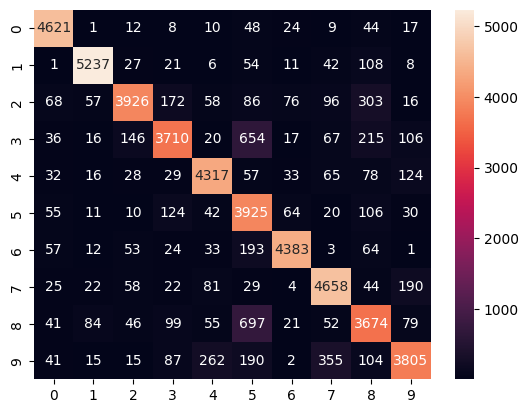

In [100]:
sns.heatmap(conf_mx, annot=True, fmt=".0f");

In [ ]:
## Analisando onde poderiamos melhorar o modelo

np.fill_diagonal(conf_mx, 0)
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx / row_sums

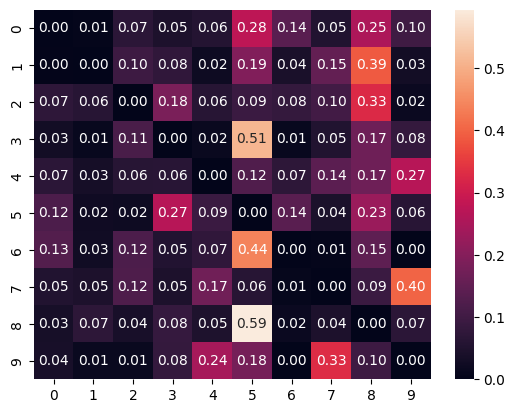

In [109]:
sns.heatmap(norm_conf_mx, annot=True, fmt=".2f");

### Modelo Multilabel

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # é maior que 7
y_train_odd = (y_train % 2 == 1) # é impar
y_multilabel = np.c_[y_train_large, y_train_odd]

In [111]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


array([[False, False]])

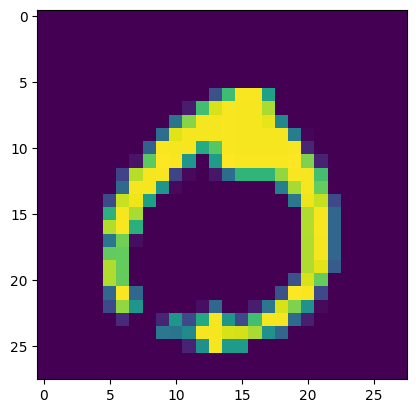

In [ ]:
n = 4

digit = x_train[n]
plt.imshow(digit.reshape(28,28));
knn_clf.predict([digit])

array([[False,  True]])

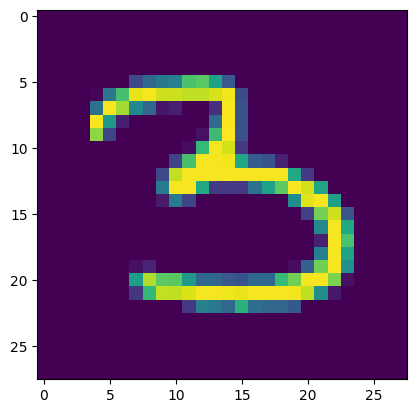

In [113]:
n = 5

digit = x_train[n]
plt.imshow(digit.reshape(28,28));
knn_clf.predict([digit])

array([[False,  True]])

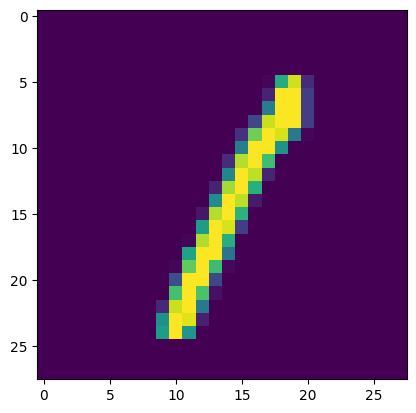

In [114]:
n = 6

digit = x_train[n]
plt.imshow(digit.reshape(28,28));
knn_clf.predict([digit])